In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:

#input_dir = 'output-files-bootstrap-test6b-4d-2a'


#input_dir = 'output-files-bootstrap-test6b-2d-2a'

#input_dir = 'bootstrap-simple-pdf-toy-study6b-2d-v1b'

#input_dir = 'output-files-bootstrap-test6b-2d-2a-100k'

input_dir = 'bootstrap-toy-study6b-2d-4c'
input_dir = 'bootstrap-simple-pdf-toy-study6b-2d-4c'


In [3]:
with open( '%s/correlations.npy' % input_dir, 'rb') as f :
    all_points_df0 = np.load(f)
    all_points_df1 = np.load(f)
    all_points_dr = np.load(f)
    all_points_corr_array = np.load(f)


In [4]:
print("\n\n\n")
print("  all_points_df0 shape:  %s" % str(all_points_df0.shape))
print("  all_points_corr_array shape:  %s" % str(all_points_corr_array.shape))
print("\n\n\n")





  all_points_df0 shape:  (1000000,)
  all_points_corr_array shape:  (1000000,)






In [5]:
with open( '%s/correlation-points-feature-coords.npy' % input_dir, 'rb') as f :
    all_points_f0b = np.load(f)
    all_points_f1b = np.load(f)

## Remove the points with correlation = 1 (self pairs)

In [6]:
mask =  (all_points_corr_array<0.99999) 

all_points_corr_array = all_points_corr_array[mask]
print(" shape of array after mask: %s" % str(all_points_corr_array.shape))

all_points_df0 = all_points_df0[mask]
all_points_df1 = all_points_df1[mask]
all_points_dr = all_points_dr[mask]

all_points_f0b = all_points_f0b[mask]
all_points_f1b = all_points_f1b[mask]


 shape of array after mask: (999000,)


In [7]:
mask

array([False,  True,  True, ...,  True,  True, False])

In [8]:
np.max(all_points_corr_array)

0.9999848060086608

<function matplotlib.pyplot.show(close=None, block=None)>

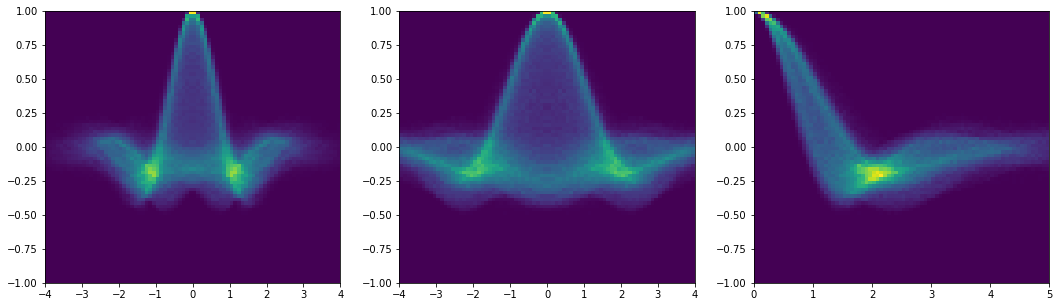

In [9]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( all_points_df1, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], range=([0,5],[-1,1]))

#plt.savefig('correlation-vs-distance.png', bbox_inches='tight')
#plt.savefig('correlation-vs-distance.pdf', bbox_inches='tight')

plt.show

In [10]:
import matplotlib as mpl

<function matplotlib.pyplot.show(close=None, block=None)>

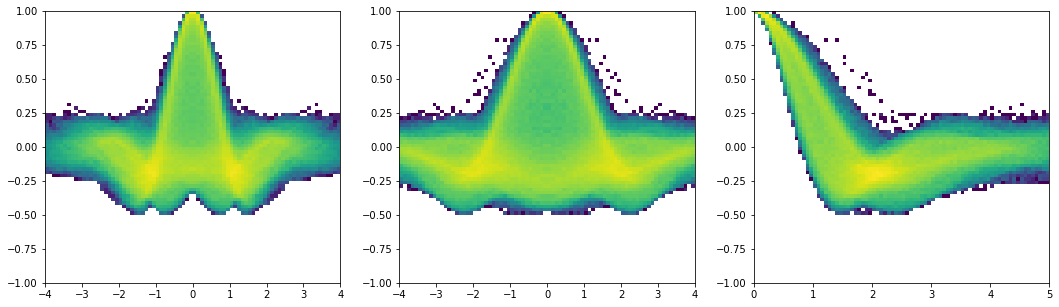

In [11]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], norm=mpl.colors.LogNorm(), range=([-4,4],[-1,1]))
ax[1].hist2d( all_points_df1, all_points_corr_array, bins=[80,80], norm=mpl.colors.LogNorm(), range=([-4,4],[-1,1]))
ax[2].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], norm=mpl.colors.LogNorm(), range=([0,5],[-1,1]))

#plt.savefig('correlation-vs-distance.png', bbox_inches='tight')
#plt.savefig('correlation-vs-distance.pdf', bbox_inches='tight')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

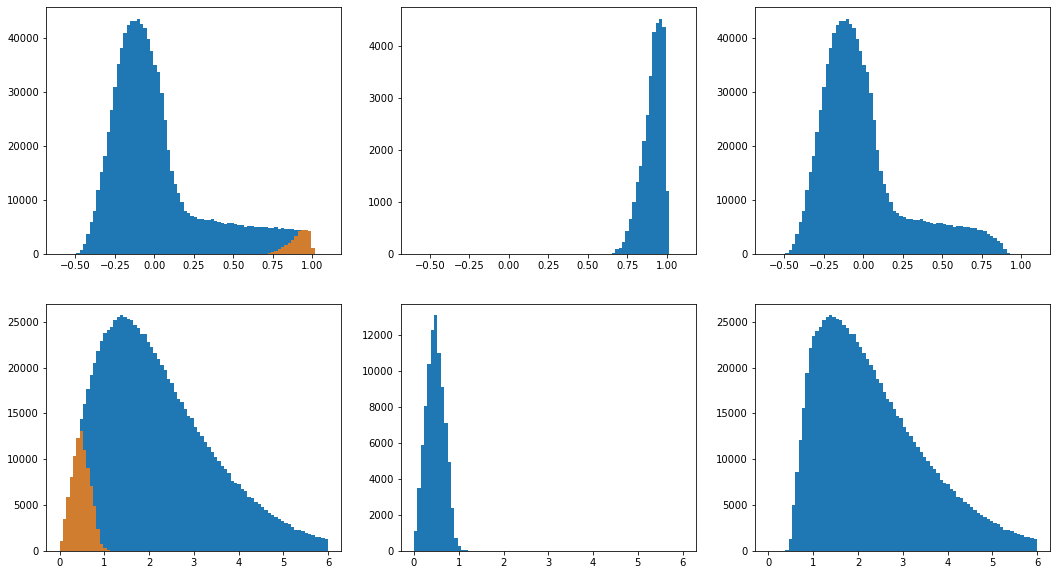

In [12]:
fig,ax = plt.subplots( 2, 3, figsize=(18,10))

hbins=80
hmax_dr = 6
min_cor = -0.6
max_cor = 1.1

dr_cut = 0.4
cor_cut = 0.6

ax[0][0].hist( all_points_corr_array, bins=hbins, range=[min_cor,max_cor])
ax[0][0].hist( all_points_corr_array[all_points_dr<dr_cut], bins=hbins, range=[min_cor,max_cor], alpha=0.8)
#ax[0][0].set_yscale('log')

ax[0][1].hist( all_points_corr_array[all_points_dr<dr_cut], bins=hbins, range=[min_cor,max_cor])

ax[0][2].hist( all_points_corr_array[all_points_dr>dr_cut], bins=hbins, range=[min_cor,max_cor])





ax[1][0].hist( all_points_dr, bins=hbins, range=[0,hmax_dr])
ax[1][0].hist( all_points_dr[all_points_corr_array>cor_cut], bins=hbins, range=[0,hmax_dr], alpha=0.8)

ax[1][1].hist( all_points_dr[all_points_corr_array>cor_cut], bins=hbins, range=[0,hmax_dr])

ax[1][2].hist( all_points_dr[all_points_corr_array<cor_cut], bins=hbins, range=[0,hmax_dr])




plt.show

In [13]:
num_total = len(all_points_dr)
num_large_correlation = len(all_points_dr[all_points_corr_array>cor_cut])
frac_large_correlation = (1.*num_large_correlation)/(1.*num_total)
print("\n\n Fraction with large correlations:  %d / %d = %.4f\n\n" % 
      (num_large_correlation, num_total,frac_large_correlation ) )



 Fraction with large correlations:  89952 / 999000 = 0.0900




In [14]:
def profile2d( axis, xvals, yvals, hbins, hrange, drawhist=True, drawline=True ) :
    
    hist_data = axis.hist2d( xvals, yvals, bins=hbins, range=hrange)
    
    if not drawhist :
        ax.cla()

    nybins = len(hist_data[0][0])
    print("number of y bins: %d" % nybins)

    nxbins = len(hist_data[0])
    print("number of x bins: %d" % nxbins)



    x_vals = np.zeros( nxbins )
    avey_vals = np.zeros( nxbins )
    rmsy_vals = np.zeros( nxbins )

    for xbi in range( nxbins ) :

        wsum = 0
        ywsum = 0
        yywsum = 0

        xval = 0.5 * ( hist_data[1][xbi] + hist_data[1][xbi+1] )
        #print(" xbin %d has center at %6.3f" % ( xbin_ind, xval ))

        for ybi in range( nybins ) :  
            yval = 0.5 * ( hist_data[2][ybi] + hist_data[2][ybi+1] )
            bin_content = hist_data[0][xbi][ybi]
            wsum = wsum + bin_content
            ywsum = ywsum + yval * bin_content
            yywsum = yywsum + yval * yval * bin_content
            #print("  %3d : y = %6.3f  bin content = %7d" % (bi, yval, bin_content))

        ave_y = ywsum / wsum
        ave_yy = yywsum / wsum
        rms_y = ave_yy - ave_y * ave_y
        #print(" Ave y = %.3f, RMS y = %.3f" % ( ave_y, rms_y) )

        x_vals[xbi] = xval
        avey_vals[xbi] = ave_y
        rmsy_vals[xbi] = rms_y


    #for xbi in range( nxbins ) :
        #print("  %4d :  x = %7.3f   ave y = %7.3f  rms y = %7.3f" % ( xbi, x_vals[xbi], avey_vals[xbi], rmsy_vals[xbi]))

    if drawline :
        ax.plot( (hist_data[1][0], hist_data[1][-1]), (0,0) )  
    
    ax.errorbar( x_vals, avey_vals, yerr=rmsy_vals, fmt='-o')

    
    plt.show
    

number of y bins: 80
number of x bins: 80


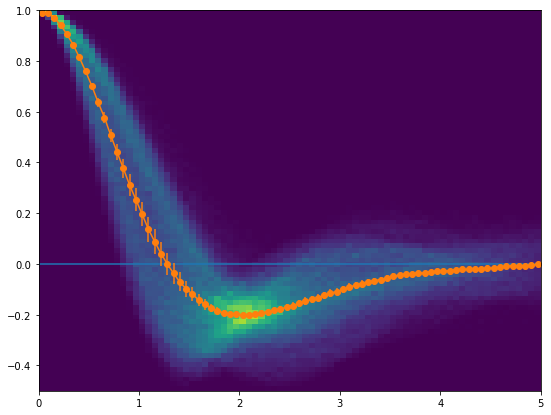

In [15]:
fig,ax = plt.subplots(1,1,figsize=(9,7))

profile2d( ax, all_points_dr, all_points_corr_array, hbins=[80,80], hrange=([0,5],[-0.5,1]), drawhist=True)